In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LeakyReLU
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

# Plant

In [2]:
specific_train = 'corn'

# Definitions

In [3]:
image_size = tuple((64, 64))
height = image_size[0]
width = image_size[1]
depth = 3

# Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/train_images/' + specific_train,
                                                 target_size = image_size,
                                                 batch_size = 32)

Found 4102 images belonging to 4 classes.


In [5]:
num_classes = len(training_set.class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)
class_indices = training_set.class_indices
class_indices

{'blight': 0, 'gray': 1, 'healthly': 2, 'rust': 3}

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_images/' + specific_train,
                                            target_size = image_size,
                                            batch_size = 32)

Found 1164 images belonging to 4 classes.


# Part 2 - Building the CNN


In [7]:
cnn = Sequential()

Step 1 - Convolution


In [8]:
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(height, width, depth)))
cnn.add(BatchNormalization(axis=-1))

In [9]:
cnn.add(MaxPool2D(pool_size=(3, 3)))
cnn.add(Dropout(0.25))

Adding a second convolutional layer

In [10]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'))
cnn.add(BatchNormalization(axis=-1))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'))
cnn.add(MaxPool2D(pool_size=8, strides=4))
cnn.add(Dropout(0.25))

## Flattening

In [11]:
cnn.add(Flatten())

Step 4 - Full Connection

In [12]:
cnn.add(Dense(units=128, activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

Step 5 - Output Layer

In [13]:
cnn.add(Dense(units=num_classes, activation='softmax'))

# Part 3 - Training the CNN

Compiling the CNN

In [14]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
129/129 [==============================] - 36s 276ms/step - loss: 0.6475 - accuracy: 0.7633 - val_loss: 1.4929 - val_accuracy: 0.3067
Epoch 2/15
129/129 [==============================] - 33s 258ms/step - loss: 0.4005 - accuracy: 0.8340 - val_loss: 1.1100 - val_accuracy: 0.4373
Epoch 3/15
129/129 [==============================] - 33s 258ms/step - loss: 0.3555 - accuracy: 0.8528 - val_loss: 1.0383 - val_accuracy: 0.5722
Epoch 4/15
129/129 [==============================] - 34s 263ms/step - loss: 0.3236 - accuracy: 0.8671 - val_loss: 0.7920 - val_accuracy: 0.6907
Epoch 5/15
129/129 [==============================] - 33s 258ms/step - loss: 0.3189 - accuracy: 0.8720 - val_loss: 0.3694 - val_accuracy: 0.8703
Epoch 6/15
129/129 [==============================] - 33s 257ms/step - loss: 0.3056 - accuracy: 0.8803 - val_loss: 0.2777 - val_accuracy: 0.8849
Epoch 7/15
129/129 [==============================] - 34s 261ms/step - loss: 0.2738 - accuracy: 0.8874 - val_loss: 0.3707 - val_ac

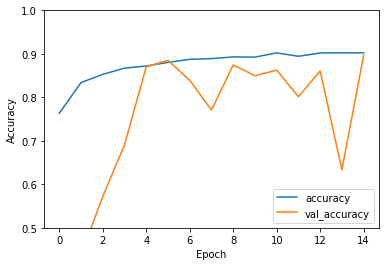

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Saving the model

In [17]:
cnn.save(f'model/{specific_train}')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/corn\assets
